In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.nonparametric.smoothers_lowess as sm_lowess


# Charger les données
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

# Afficher la forme et les colonnes du Train et Test sets
print("=== TRAIN SET ===")
print(train.shape)
print(train.columns)

print("\n=== TEST SET ===")
print(test.shape)
print(test.columns)

# Aperçu des premières lignes
train.head()


=== TRAIN SET ===
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

=== TEST SET ===
(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Étudier les valeurs manquantes

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

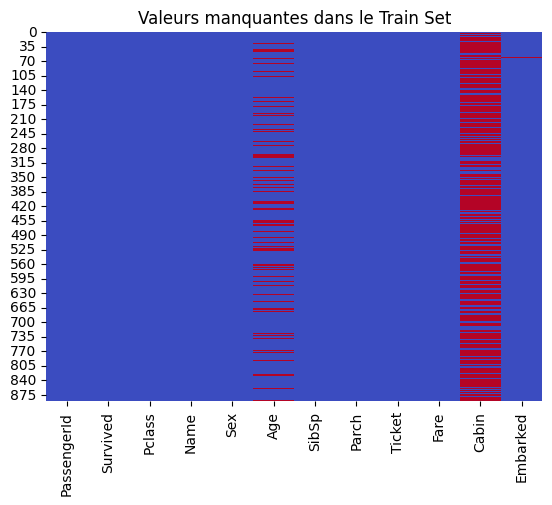

In [5]:
plt.Figure(figsize=(10,5))
sns.heatmap(train.isnull(), cbar=False, cmap='coolwarm')
plt.title("Valeurs manquantes dans le Train Set")
plt.show()

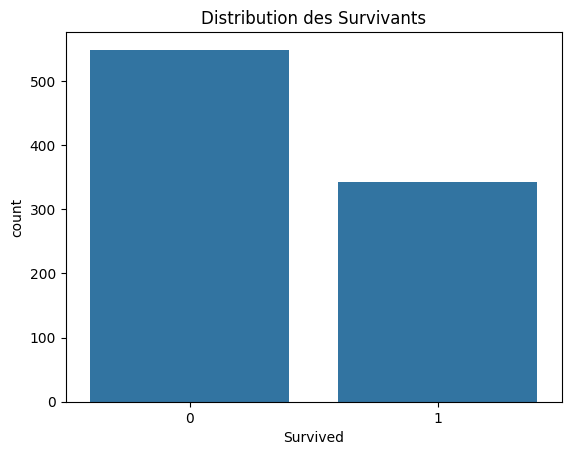

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [13]:
sns.countplot(data=train, x='Survived')
plt.title("Distribution des Survivants")
plt.show()

train['Survived'].value_counts(normalize=True)

Environ 38 % des passagers ont survécu

62 % sont morts

# Survie selon le sexe

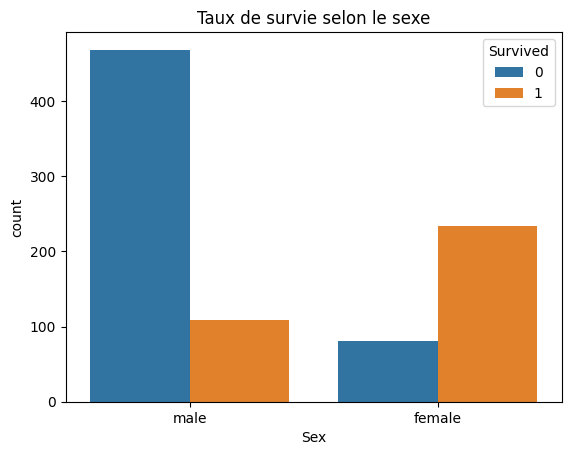

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [7]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("Taux de survie selon le sexe")
plt.show()

train.groupby('Sex')['Survived'].mean()


74 % des femmes ont survécu

19 % des hommes seulement

# Survie selon la classe (Pclass)

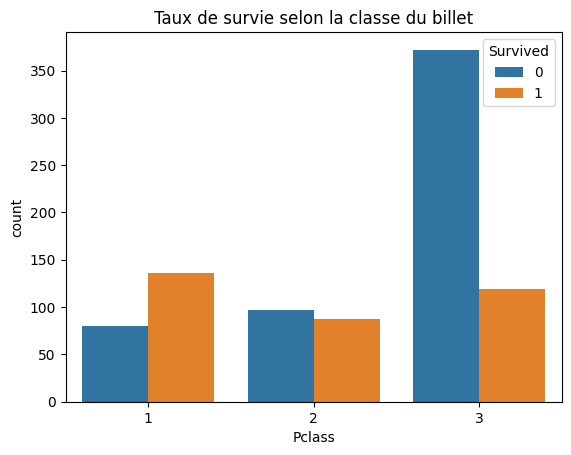

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [8]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title("Taux de survie selon la classe du billet")
plt.show()

train.groupby('Pclass')['Survived'].mean()


# Survie selon l’âge

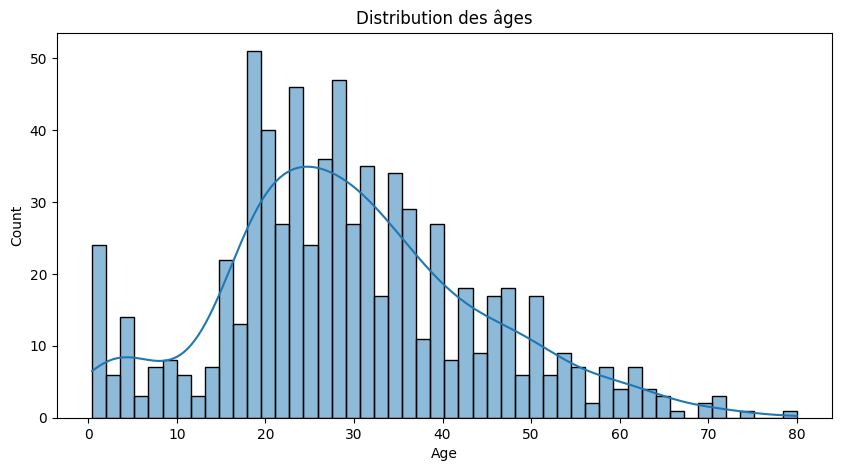

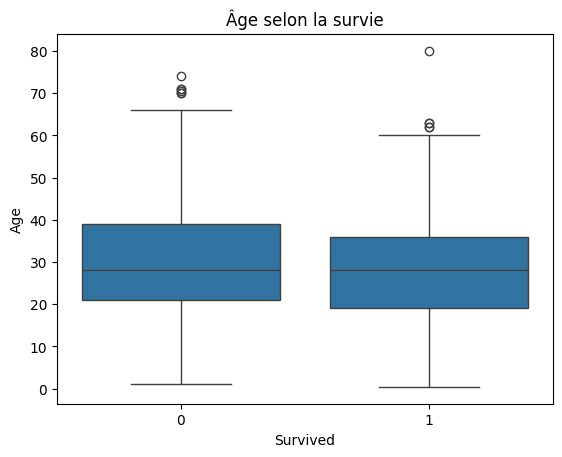

In [3]:
plt.figure(figsize=(10,5))
sns.histplot(train['Age'], bins=50, kde=True)
plt.title("Distribution des âges")
plt.show()

sns.boxplot(data=train, x='Survived', y='Age')
plt.title("Âge selon la survie")
plt.show()


In [4]:
import sys
!"{sys.executable}" -m pip install statsmodels


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# courbe LOWESS = la probabilité de survie selon l’âge

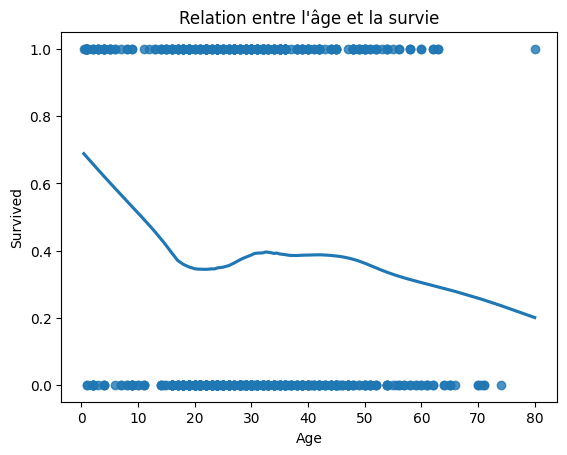

In [5]:
sns.regplot(x='Age', y='Survived', data=train, lowess=True)
plt.title("Relation entre l'âge et la survie")
plt.show()

- La corrélation linéaire Age–Survived est faible
- mais la relation est clairement non linéaire

Enfants → survie haute   ****        Adultes → survie moyenne      ****       Seniors → survie faible

In [6]:
import sys
sys.executable


'c:\\Users\\hamza\\projets data scientist\\projet titanic\\01_titanic_statistical_analysis\\.venv\\Scripts\\python.exe'

# Survie selon le port d’embarquement (Embarked)

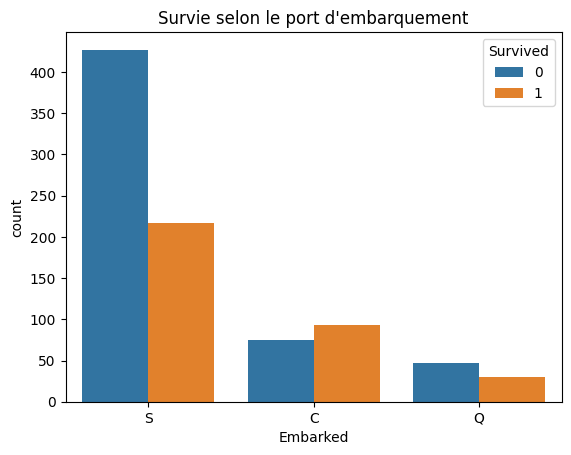

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [19]:
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.title("Survie selon le port d'embarquement")
plt.show()

train.groupby('Embarked')['Survived'].mean()


# Survie selon le prix du billet (Fare)

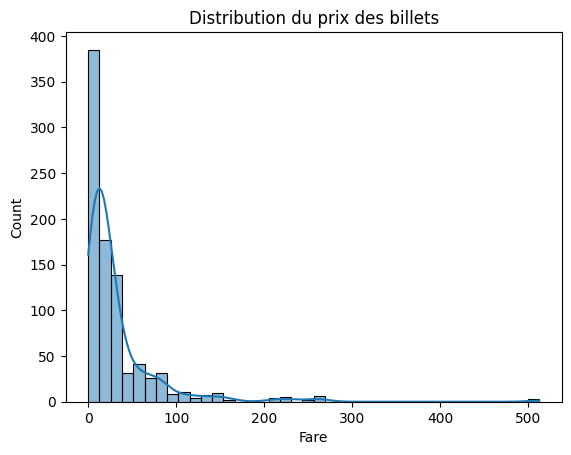

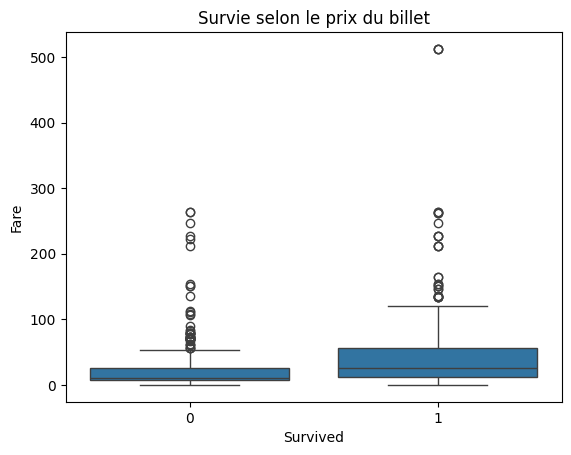

In [25]:
sns.histplot(train['Fare'], bins=40, kde=True)
plt.title("Distribution du prix des billets")
plt.show()

sns.boxplot(data=train, x='Survived', y='Fare')
plt.title("Survie selon le prix du billet")
plt.show()


Conversion en valeurs numériques : male = 0 , female = 1

In [40]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})


In [41]:
train['Sex'].head()



0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

Conversion en valeurs numériques : 'S'= 0 , 'C'=1, 'Q'=2

In [43]:
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [44]:
train['Embarked'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Embarked, dtype: float64

# matrice de corrélation

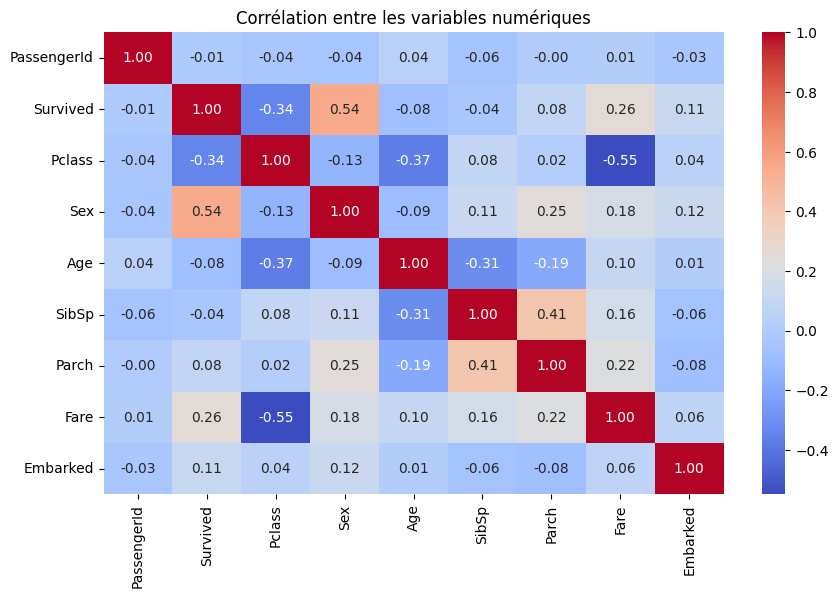

In [45]:
df_num = train.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les variables numériques")
plt.show()

# Nettoyer complètement les valeurs manquantes

j'ai remarqué que il y a 177 valeurs manquantes de la variable âge et 687 de la variable cabin et 2 pour la variable embarked

la valeur qui représente un grand impacte par rapport aux autres c'est l'age, en plus il ya bcp des valeurs manquantes, alors j'ai décidé de opter une méthode qui me semble bien pour remplir les valeurs manquantes : remplacer les valeurs manquantes par la médiane des groupes trié par le titre dans le nom du passagers : 

| Title   | âge médian          |
| ------- | ------------------- |
| Master  | **4 ans** → enfants |
| Miss    | **21 ans**          |
| Mrs     | **36 ans**          |
| Mr      | **30 ans**          |
| Officer | **46 ans**          |
| Noble   | **45 ans**          |


In [3]:
#extraire le titre des noms des passagers
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\hamza\AppData\Local\Temp\ipykernel_13924\1556516618.py:2: SyntaxWarning: invalid escape sequence '\.'
  train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')


In [4]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [5]:
train['Title'].head(20)


0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
Name: Title, dtype: object

In [6]:
train['Title'].value_counts()


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [15]:
# Convertir les titres rares en titres principaux
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace(['Mme'], 'Mrs')

train['Title'] = train['Title'].replace(
    ['Lady','Countess','Dona','Sir','Don','Jonkheer'],
    'Noble'
)

train['Title'] = train['Title'].replace(
    ['Capt','Col','Major','Rev','Dr'],
    'Officer'
)


In [16]:
train['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Noble', 'Officer'], dtype=object)

In [17]:
train.groupby('Title')['Age'].median()


Title
Master      3.5
Miss       21.0
Mr         30.0
Mrs        35.0
Noble      40.0
Officer    50.0
Name: Age, dtype: float64

In [18]:
train['Age']=train.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [19]:
train['Age'].isnull().sum()

np.int64(0)

In [21]:
train['Title'].head(40)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
20        Mr
21        Mr
22      Miss
23        Mr
24      Miss
25       Mrs
26        Mr
27        Mr
28      Miss
29        Mr
30     Noble
31       Mrs
32      Miss
33        Mr
34        Mr
35        Mr
36        Mr
37        Mr
38      Miss
39      Miss
Name: Title, dtype: object

In [22]:
# Remplacer les NaN de Embarked par la valeur la plus fréquente
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])


In [23]:
train['Embarked'].isnull().sum()
train['Embarked'].value_counts()


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [24]:
train['Cabin'] = train['Cabin'].fillna('Unknown')
test['Cabin'] = test['Cabin'].fillna('Unknown')


In [25]:
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]


In [26]:
train['Deck'].value_counts()


Deck
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

Les ponts A-B-C = riches → probabilité de survie plus élevée

U = passagers pauvres ou sans cabine enregistrée

In [27]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,U
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Unknown,Q,Mr,U
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S,Master,U
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S,Mrs,U
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C,Mrs,U


In [28]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size']  = test['SibSp']  + test['Parch']  + 1


In [29]:
train[['SibSp','Parch','Family_Size']].head()
train['Family_Size'].value_counts()


Family_Size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [30]:
train['Age*Class'] = train['Age'] * train['Pclass']


In [31]:
train['Fare_Per_Person'] = train['Fare'] / train['Family_Size']

In [32]:
train[['Family_Size', 'Age*Class', 'Fare_Per_Person']].head()

,Family_Size,Age*Class,Fare_Per_Person
0,2,66.0,3.62500
1,2,38.0,35.64165
2,1,78.0,7.92500
3,2,35.0,26.55000
4,1,105.0,8.05000


# Matrice de corrélation avec les nouvelles colonnes

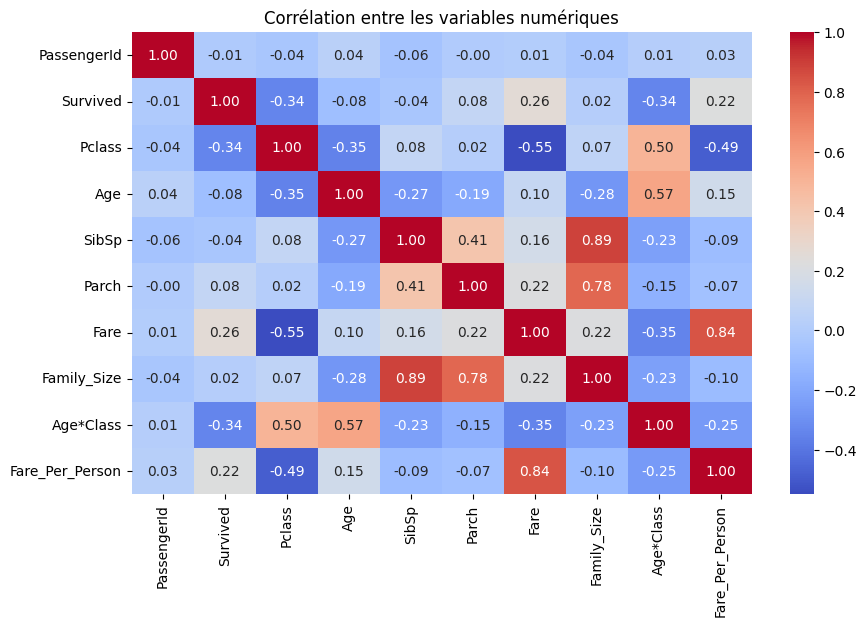

In [35]:
df_num = train.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les variables numériques")
plt.show()

# Maintenant faire une étude similaire sur le fichier de test 

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

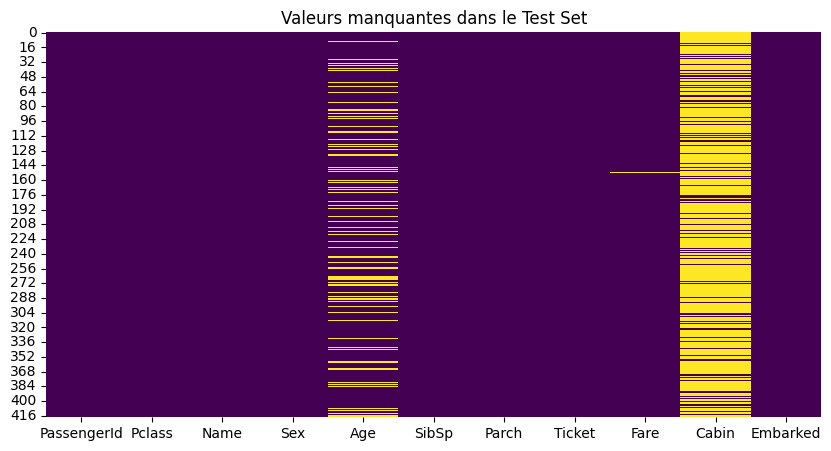

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(test.isnull(), cbar=False, cmap='viridis')
plt.title("Valeurs manquantes dans le Test Set")
plt.show()

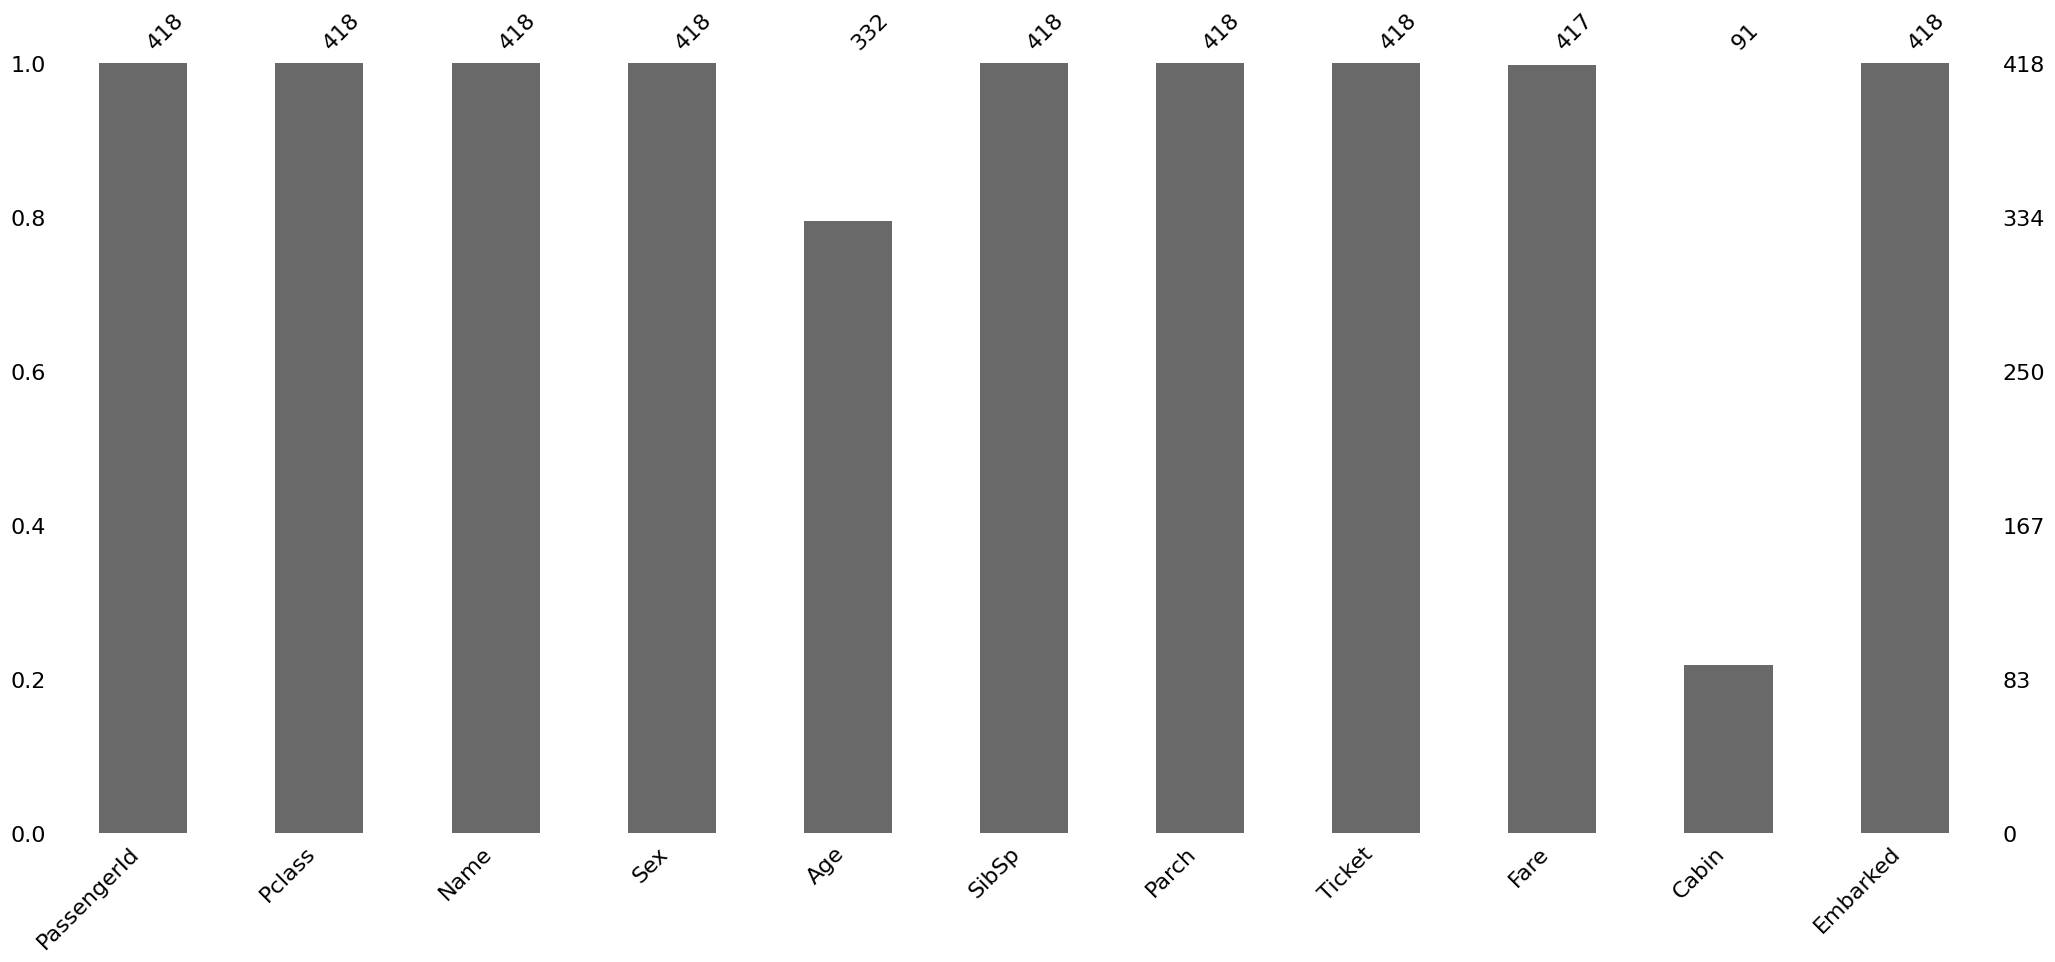

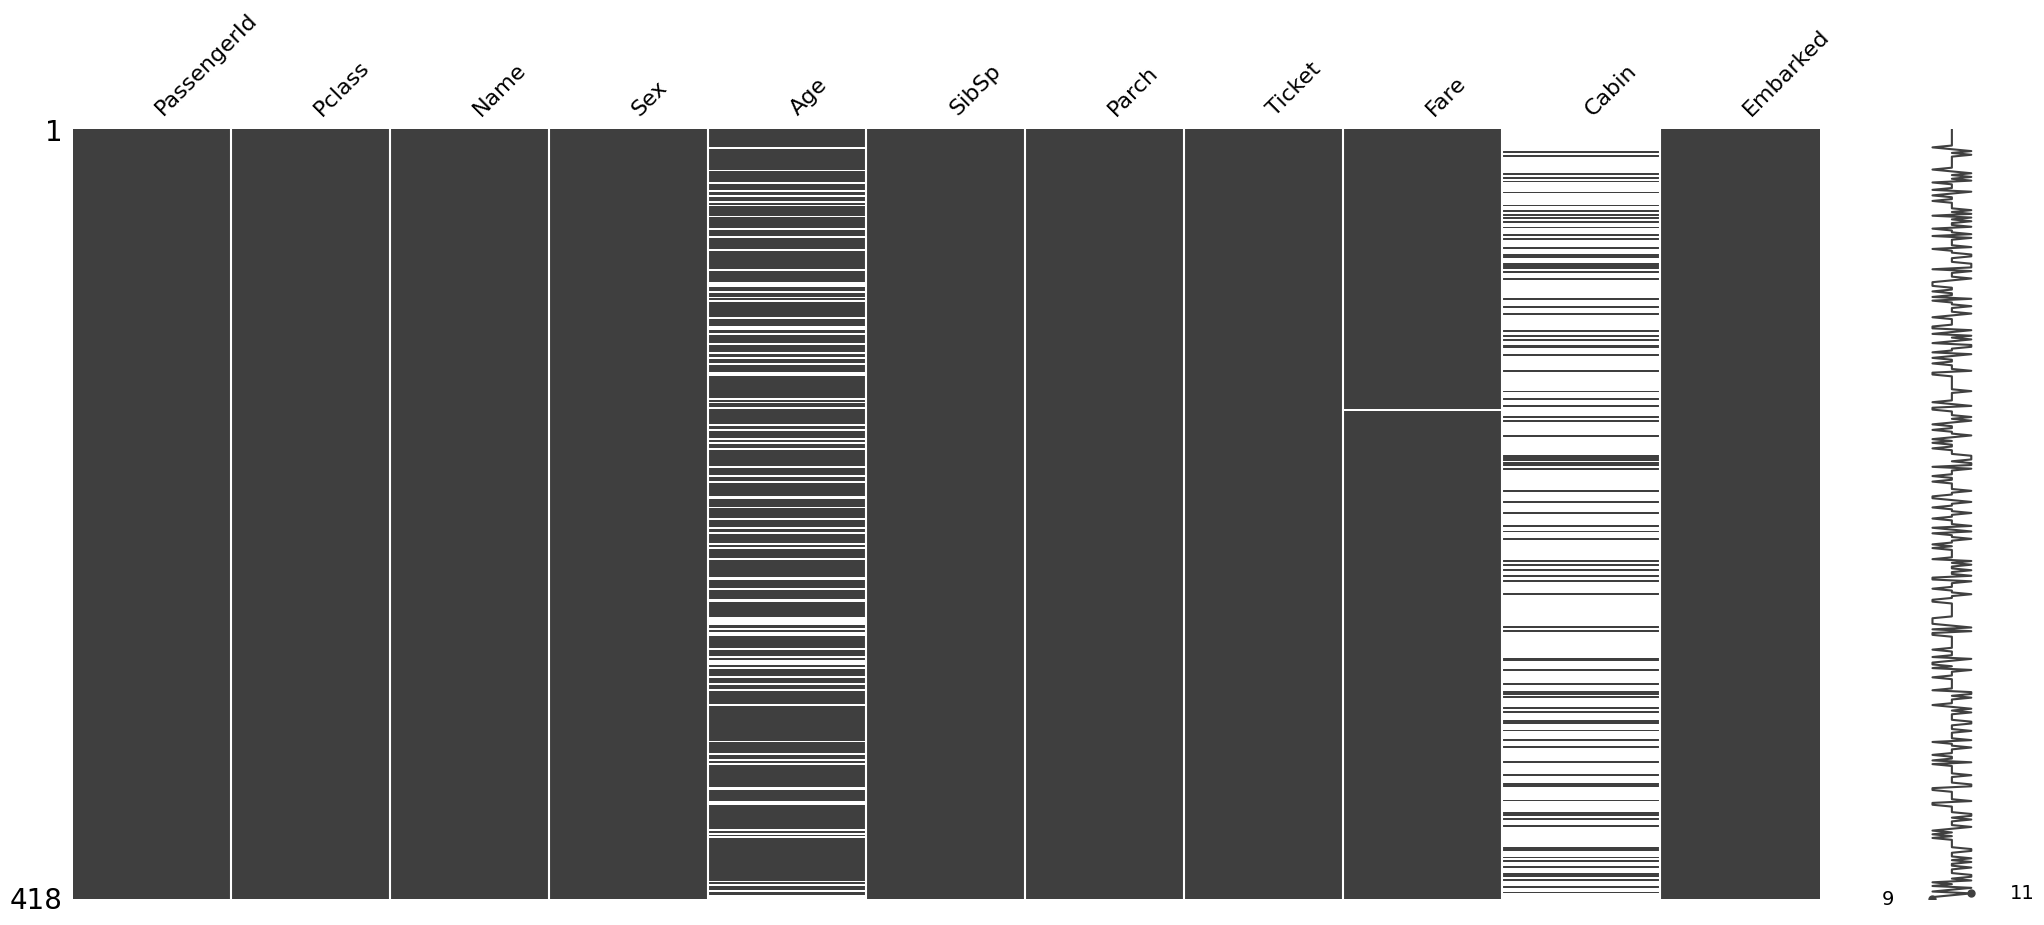

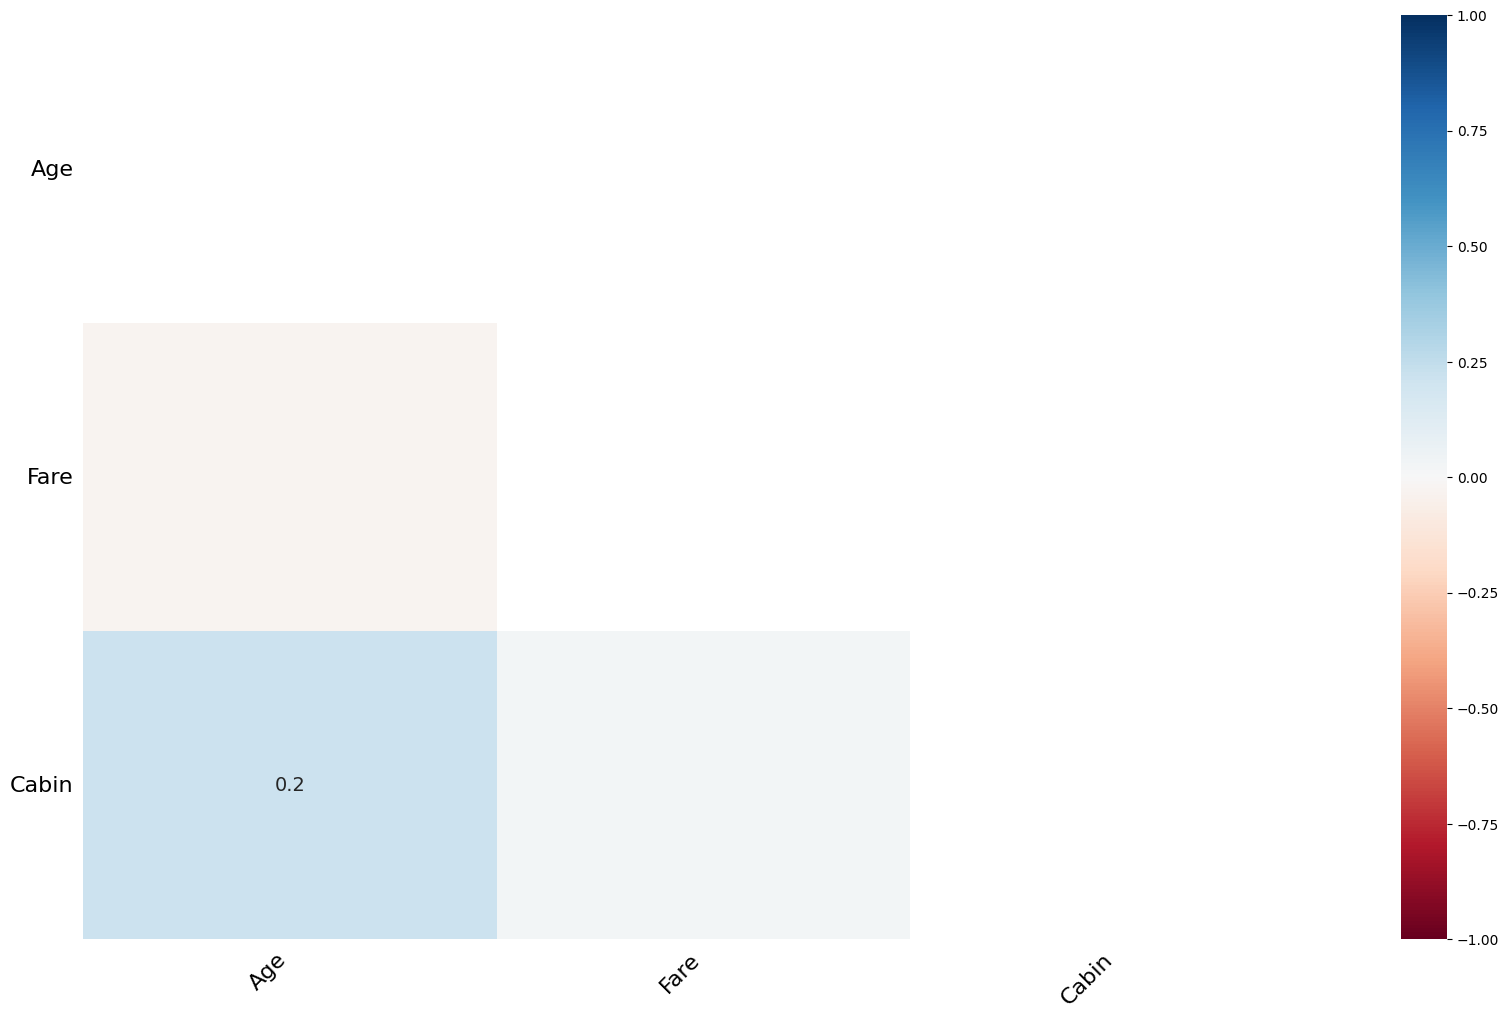

In [6]:
import missingno as msno
msno.bar(test)
plt.show()

msno.matrix(test)
plt.show()

msno.heatmap(test)
plt.show()

# Concaténer ( train -> test )

In [7]:
full = pd.concat([train, test], sort=False).reset_index(drop=True)

In [8]:
full["Title"] = full["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

full["FamilySize"] = full["SibSp"] + full["Parch"] + 1

full["Deck"] = full["Cabin"].str[0]
full["FarePerPerson"] = full["Fare"] / full["FamilySize"]

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\hamza\AppData\Local\Temp\ipykernel_9252\1871943563.py:1: SyntaxWarning: invalid escape sequence '\.'
  full["Title"] = full["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)


In [9]:
full[["Name", "Title"]].head()


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [14]:
full["Title"].value_counts()


Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Don           1
Sir           1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [16]:
full["Title"] = full["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

full['Title'] = full['Title'].replace(['Mlle','Ms'], 'Miss')
full['Title'] = full['Title'].replace(['Mme'], 'Mrs')
full['Title'] = full['Title'].replace(
    ['Lady','Countess','Dona','Sir','Don','Jonkheer'], 
    'Noble'
)
full['Title'] = full['Title'].replace(
    ['Capt','Col','Major','Rev','Dr'], 
    'Officer'
)


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\hamza\AppData\Local\Temp\ipykernel_9252\2189914816.py:1: SyntaxWarning: invalid escape sequence '\.'
  full["Title"] = full["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)


In [19]:
full["Age"] = full.groupby("Title")["Age"].transform(lambda x: x.fillna(x.median()))

In [21]:
full["Deck"] = full["Deck"].fillna("U")
full["Fare"] = full["Fare"].fillna(full["Fare"].median())
full["Embarked"] = full["Embarked"].fillna(full["Embarked"].mode()[0])

In [22]:
full[["Title", "Age"]].isnull().sum()


Title    0
Age      0
dtype: int64

# Séparer train et test après la concaténation


In [24]:
len_train = len(train)


In [25]:
train_fe = full.iloc[:len_train]
test_fe  = full.iloc[len_train:]


In [26]:
print(len_train)
print(train_fe.shape)
print(test_fe.shape)


891
(891, 16)
(418, 16)


In [32]:
train_fe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Deck,FarePerPerson
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2,U,3.62500
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2,C,35.64165
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1,U,7.92500
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2,C,26.55000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1,U,8.05000


In [31]:
test_fe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Deck,FarePerPerson
891,NaN,3,male,34.5,0,0,7.8292,Q,Mr,1,U,7.829200
892,NaN,3,female,47.0,1,0,7.0000,S,Mrs,2,U,3.500000
893,NaN,2,male,62.0,0,0,9.6875,Q,Mr,1,U,9.687500
894,NaN,3,male,27.0,0,0,8.6625,S,Mr,1,U,8.662500
895,NaN,3,female,22.0,1,1,12.2875,S,Mrs,3,U,4.095833


In [29]:
full["Deck"].value_counts(dropna=False)
full["Deck"].isnull().sum()


np.int64(0)

# suppression du bruit

In [30]:
cols_to_drop = ["Cabin", "Name", "Ticket", "PassengerId"]

train_fe = train_fe.drop(columns=cols_to_drop)
test_fe  = test_fe.drop(columns=cols_to_drop)


In [33]:
test_fe.isnull().sum()


Survived         418
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Title              0
FamilySize         0
Deck               0
FarePerPerson      1
dtype: int64

In [34]:
test_fe["FarePerPerson"] = test_fe["Fare"] / test_fe["FamilySize"]


In [35]:
test_fe["FarePerPerson"].isnull().sum()


np.int64(0)

In [36]:
train_fe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Deck,FarePerPerson
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2,U,3.62500
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2,C,35.64165
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1,U,7.92500
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2,C,26.55000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1,U,8.05000


In [37]:
train_fe.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
FamilySize       0
Deck             0
FarePerPerson    0
dtype: int64

# ENCODAGE DES VARIABLES CATÉGORIELLES

In [ ]:
categorical_cols = ["Sex", "Embarked", "Title", "Deck"]


In [39]:
# One-Hot Encoding
train_encoded = pd.get_dummies(train_fe, columns=categorical_cols, drop_first=True)
test_encoded  = pd.get_dummies(test_fe,  columns=categorical_cols, drop_first=True)


In [40]:
# Aligner les colonnes entre train et test
train_encoded, test_encoded = train_encoded.align(test_encoded, join="left", axis=1)


In [41]:
# Remplir les NaN dans test (créés par align)
test_encoded = test_encoded.fillna(0)

In [42]:
# Séparation X et y
X_train = train_encoded.drop("Survived", axis=1)
y_train = train_encoded["Survived"]

In [ ]:
X_test = test_encoded.drop("Survived", axis=1, errors="ignore") 

In [44]:
train_encoded.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson,Sex_male,Embarked_Q,...,Title_Noble,Title_Officer,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,22.0,1,0,7.2500,2,3.62500,True,False,...,False,False,False,False,False,False,False,False,False,True
1,1.0,1,38.0,1,0,71.2833,2,35.64165,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1.0,3,26.0,0,0,7.9250,1,7.92500,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.0,1,35.0,1,0,53.1000,2,26.55000,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0.0,3,35.0,0,0,8.0500,1,8.05000,True,False,...,False,False,False,False,False,False,False,False,False,True


In [46]:
full["Cabin"].dropna().str[0].unique()


array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [45]:
train_encoded.columns


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'FarePerPerson', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Noble', 'Title_Officer', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U'],
      dtype='object')